# MusicBox User Tutorial

Hello, and welcome to the MusicBox user tutorial! Here, we will be covering some basic usages of the MusicBox library.

# What is MusicBox?

MusicBox is a library with a Python API for boxes and columns <b>(what does this mean exactly?)</b> that builds on top of MUSICA, a collection of modeling software, tools, and grids that allow for robust modeling of chemistry in Earth's atmosphere.

# Downloading MusicBox

To install MusicBox onto your device, run

```
pip install acom-music-box
```

Note: Installing MusicBox will automatically install MUSICA, a required dependency of MusicBox that is used throughout this tutorial.

# Importing MusicBox

To import your newly-downloaded MusicBox into a Python file (as well as some other libraries so that this demo can run):

In [580]:
from acom_music_box import MusicBox, Conditions
import musica.mechanism_configuration as mc
import matplotlib.pyplot as plt

# Defining a System

In MusicBox, a system represents a set of species and their respective phases.</br>
A species is simply a reactant or product in a chemical reaction.</br>
<b>(This probably needs a fact-check. For example, are catalysts supported?)</b></br>
You have the freedom to name a species anything in MusicBox, just make sure that it is logical to you.</br>
For extended documentation about the Species class, go [here](https://ncar.github.io/musica/api/python.html#musica.mechanism_configuration.Species).</br>
Here is an example function of a basic Arrhenius reaction:

In [581]:
class Tutorial:
    def define_system(self):
        X = mc.Species(name="X")
        Y = mc.Species(name="Y")
        Z = mc.Species(name="Z")
        species = {"X": X, "Y": Y, "Z": Z}
        gas = mc.Phase(name="gas", species=list(species.values()))
        return gas, species

The define_system() function creates 3 species called X, Y, and Z and adds them to a dictionary called species.</br>
Next, a gas object is created to represent the phase of the species and then the gas and species objects are returned.

# Defining Reactions

A chemical reaction is a process that results into a set of reactants transforming into a set of products.</br>
To define a reaction in MusicBox:

In [582]:
class Tutorial(Tutorial):
    def define_reactions(self, gas, species):
        arr1 = mc.Arrhenius(name="X->Y", A=4.0e-3, C=50, reactants=[species["X"]], products=[species["Y"]], gas_phase=gas)
        arr2 = mc.Arrhenius(name="Y->Z", A=4.0e-3, C=50, reactants=[species["Y"]], products=[species["Z"]], gas_phase=gas)
        # Not sure what to do with the constants here
        rxns = {"X->Y": arr1, "Y->Z": arr2}
        return rxns

The define_reaction() function takes in the gas and species variables returned from the define_system() function.</br>
Using the species and gas variables, the function creates two reactions: arr1 and arr2.</br>
The arr1 variable represents the conversion of the X reacant into the Y product with some pre-defined constants as well.</br>
The arr2 variable is just like arr1, but instead it represents the conversion of the Y reactant into the Z product.</br>
These reactions are then bundled into a dictionary called rxns just like the species before, and it is returned.</br>

### Types of Reactions Supported by MusicBox

MusicBox allows for users to experiment with an array of reaction types.</br>
Go [here](https://ncar.github.io/musica/api/python.html#module-musica.mechanism_configuration) to view a list of supported reactions and their parameters.

# Defining Mechanisms

A mechanism represents a set of species with their respective phases and reactions.</br>
For extended documentation about the Mechanism class, go [here](https://ncar.github.io/musica/api/python.html#musica.mechanism_configuration.Mechanism).</br>
To create a mechanism in MusicBox:

In [583]:
class Tutorial(Tutorial):
    def define_mechanism(self, gas, species, rxns):
        mechanism = mc.Mechanism(name="tutorial_mechanism", species=list(species.values()), phases=[gas], reactions=list(rxns.values()))
        return mechanism

The define_mechanism() function builds upon the previous two functions, taking in the previously-returned gas, species, and rxn as parameters.</br>
This function simply creates a mechanism variable that represents an instance of the Mechanism class.</br>
The mechanism is first given a name, then the species, gas, and rxns are passed into their respective parameters.</br>
It is then returned from the function.

# Creating a Box Model

Box models allow you to encase your previously-created mechanism and add conditions that can change the reactions' rates over time.</br>
You can also define the length of the simulations and the time steps.</br>
To initialize a new box model:

In [584]:
class Tutorial(Tutorial):
    def create_box_model(self, mechanism):
        box_model = MusicBox()
        box_model.load_mechanism(mechanism)
        return box_model

The create_box_model() function is straightforward, simply creating an instance of the MusicBox class and then loading the mechanism through the passed-in parameter.</br>
The box_model is then returned from the function.

## Adding an Initial Condition to Your Box Model

The initial conditions of the model define the environment the mechanism takes place in at the start of the simulation.</br>
For extended documentation about the Conditions class, go [here](https://ncar.github.io/musica/api/python.html#musica.types.Conditions).</br>
To set the initial conditions of your box model:

In [585]:
class Tutorial(Tutorial):
    def set_initial_conditions(self, box_model):
        box_model.initial_conditions = Conditions(
            temperature=298.15,
            pressure=101325.0,
            species_concentrations={
                "X": 3.75,
                "Y": 5.0,
                "Z": 2.5,
            }
        )
        return box_model

The set_initial_conditions() function takes in the box_model as a parameter and calls its initial_conditons function.</br>
In the condition class, you should provide a temperature, pressure, air density (unless you just want it based on the Ideal Gas Law, which is the default), and each of the species' concentrations.</br>
The updated box_model is then returned from the function.

## Adding Evolving Conditions to Your Box Model

An evolving condition will change the environment of the mechanism at the defined time value (the first value in the function).</br>
These changes can include species concentration, temperature, pressure, et cetera.</br>
To create an evolving condition for your box model:

In [586]:
class Tutorial(Tutorial):
    def set_evolving_condition(self, box_model):
        box_model.add_evolving_condition(
            100.0,
            Conditions(
                temperature=310.0,
                pressure=100100.0
            )
        )
        return box_model

The set_evolving_condition() function is similar to the set_initial_conditions() function, with it taking in a box_model as a parameter.</br>
Just like in set_initial_conditions(), a Conditions object is inserted into one of the box_model's function, this time being its add_evolving_condition() function.</br>
However, there is now a new value put at the very beginning of the function that represents the time at which the evolving conditions takes place at.</br>
Once that is all done, the updated box_model is returned from the function.

## Additional Box Model Parameters

Box models contain some additional parameters that need to be defined</br>
These include the simulation length (how long the simulation lasts for),</br>
the chemistry step time (the number of time steps between each part of the mechanism),</br>
and the output step time (the number of time steps between each output of the mechanism).</br>
To set these parameters for your box model:

In [587]:
class Tutorial(Tutorial):
    def set_box_model_parameters(self, box_model):
        box_model.box_model_options.simulation_length = 200
        box_model.box_model_options.chem_step_time = 1
        box_model.box_model_options.output_step_time = 25
        return box_model

The set_box_model_parameters() takes in the box_model as a parameters and sets some if its attributes, including:</br>
<b>simulation_length:</b> the number of time steps that the simulation lasts for.</br>
<b>chem_step_time:</b> the number of time steps between each simulation calculation.</br>
<b>output_step_time:</b> the number of time steps between each output of the model.</br>
The updated box_model is then returned from the function.

# Running and Solving Your Box Model

Now, you are able to run and solve your newly-created box model.</br>
To solve your box model:

In [588]:
tutorial = Tutorial()
gas, species = tutorial.define_system()
reactions = tutorial.define_reactions(gas, species)
mechanism = tutorial.define_mechanism(gas, species, reactions)
box_model = tutorial.create_box_model(mechanism)
box_model = tutorial.set_initial_conditions(box_model)
box_model = tutorial.set_evolving_condition(box_model)
box_model = tutorial.set_box_model_parameters(box_model)
df = box_model.solve()

This section takes all the functions built in the previous code cells and runs them all sequentially.</br>
Though, the Tutorial object does need to be created first so that you can access the functions.</br>
Once you run all of the functions in the correct order, your model is ready to be solved, which is done simply by calling the solve() function on your box_model.

# View Outputs and Visualizations

MusicBox supports viewing your simulation's outputs as well as visualizing it.</br>
To view your solved model and a basic visualization of it:

   time.s  ENV.temperature.K  ENV.pressure.Pa  ENV.air number density.mol m-3  \
0     0.0             298.15         101325.0                       40.874045   
1    25.0             298.15         101325.0                       40.874045   
2    50.0             298.15         101325.0                       40.874045   
3    75.0             298.15         101325.0                       40.874045   
4   100.0             298.15         101325.0                       40.874045   
5   125.0             310.00         100100.0                       38.836331   
6   150.0             310.00         100100.0                       38.836331   
7   175.0             310.00         100100.0                       38.836331   
8   200.0             310.00         100100.0                       38.836331   

   CONC.X.mol m-3  CONC.Y.mol m-3  CONC.Z.mol m-3  
0        3.750000        5.000000        2.500000  
1        3.331750        4.836340        3.081911  
2        2.960148        4.646988

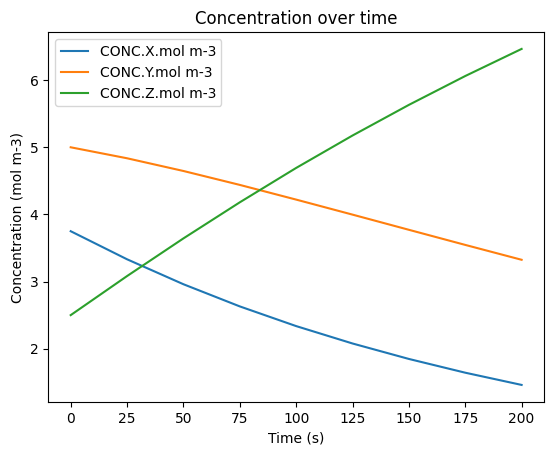

In [589]:
print(df)
df.plot(x='time.s', y=['CONC.X.mol m-3', 'CONC.Y.mol m-3', 'CONC.Z.mol m-3'], title='Concentration over time', ylabel='Concentration (mol m-3)', xlabel='Time (s)')
plt.show()

This code snippet prints out the output of the simulation that was just ran as well as it utilizing Python's matplotlib library to visualize it.</br>
To do so, the plot() function is called, with the desired independent variable (time) and dependent variables (concentration of each species) being passed in.</br>
The plot is also given a title as well as a label for both the x-axis and the y-axis.</br>
Lastly, the show() function is called so that you can see the plot directly above this text.

# 

# Full Code Snippet

Here is all the code compiled into one code block for easier viewing and running:

   time.s  ENV.temperature.K  ENV.pressure.Pa  ENV.air number density.mol m-3  \
0     0.0             298.15         101325.0                       40.874045   
1    25.0             298.15         101325.0                       40.874045   
2    50.0             298.15         101325.0                       40.874045   
3    75.0             298.15         101325.0                       40.874045   
4   100.0             298.15         101325.0                       40.874045   
5   125.0             310.00         100100.0                       38.836331   
6   150.0             310.00         100100.0                       38.836331   
7   175.0             310.00         100100.0                       38.836331   
8   200.0             310.00         100100.0                       38.836331   

   CONC.X.mol m-3  CONC.Y.mol m-3  CONC.Z.mol m-3  
0        3.750000        5.000000        2.500000  
1        3.331750        4.836340        3.081911  
2        2.960148        4.646988

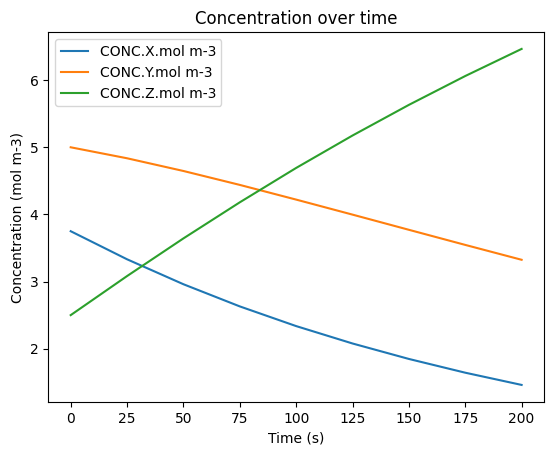

In [590]:
from acom_music_box import MusicBox, Conditions
import musica.mechanism_configuration as mc
import matplotlib.pyplot as plt

class Tutorial:
    def define_system(self):
        X = mc.Species(name="X")
        Y = mc.Species(name="Y")
        Z = mc.Species(name="Z")
        species = {"X": X, "Y": Y, "Z": Z}
        gas = mc.Phase(name="gas", species=list(species.values()))
        return gas, species
    def define_reactions(self, gas, species):
        arr1 = mc.Arrhenius(name="X->Y", A=4.0e-3, C=50, reactants=[species["X"]], products=[species["Y"]], gas_phase=gas)
        arr2 = mc.Arrhenius(name="Y->Z", A=4.0e-3, C=50, reactants=[species["Y"]], products=[species["Z"]], gas_phase=gas)
        # Not sure what to do with the constants here
        rxns = {"X->Y": arr1, "Y->Z": arr2}
        return rxns
    def define_mechanism(self, gas, species, rxns):
        mechanism = mc.Mechanism(name="tutorial_mechanism", species=list(species.values()), phases=[gas], reactions=list(rxns.values()))
        return mechanism
    def create_box_model(self, mechanism):
        box_model = MusicBox()
        box_model.load_mechanism(mechanism)
        return box_model
    def set_initial_conditions(self, box_model):
        box_model.initial_conditions = Conditions(
            temperature=298.15,
            pressure=101325.0,
            species_concentrations={
                "X": 3.75,
                "Y": 5.0,
                "Z": 2.5,
            }
        )
        return box_model
    def set_evolving_condition(self, box_model):
        box_model.add_evolving_condition(
            100.0,
            Conditions(
                temperature=310.0,
                pressure=100100.0
            )
        )
        return box_model
    def set_box_model_parameters(self, box_model):
        box_model.box_model_options.simulation_length = 200
        box_model.box_model_options.chem_step_time = 1
        box_model.box_model_options.output_step_time = 25
        return box_model
    
if __name__ == "__main__":
    tutorial = Tutorial()
    gas, species = tutorial.define_system()
    reactions = tutorial.define_reactions(gas, species)
    mechanism = tutorial.define_mechanism(gas, species, reactions)
    box_model = tutorial.create_box_model(mechanism)
    box_model = tutorial.set_initial_conditions(box_model)
    box_model = tutorial.set_evolving_condition(box_model)
    box_model = tutorial.set_box_model_parameters(box_model)
    df = box_model.solve()
    print(df)
    df.plot(x='time.s', y=['CONC.X.mol m-3', 'CONC.Y.mol m-3', 'CONC.Z.mol m-3'], title='Concentration over time', ylabel='Concentration (mol m-3)', xlabel='Time (s)')
    plt.show()